In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [58]:
df_med_county = pd.read_csv('data/medicare_county_level/medicare_county_all.csv')

In [59]:
df_med_county.head()

,Unnamed: 0,State,County,State and County FIPS Code,Beneficiaries with Part A and Part B,FFS Beneficiaries,MA Beneficiaries,MA Participation Rate,Average Age,Percent Female,...,PQI11 Bacterial Pneumonia Admission Rate (age 65-74),PQI11 Bacterial Pneumonia Admission Rate (age 75+),PQI12 UTI Admission Rate (age < 65),PQI12 UTI Admission Rate (age 65-74),PQI12 UTI Admission Rate (age 75+),PQI15 Asthma in Younger Adults Admission Rate (age < 40),PQI16 Lower Extremity Amputation Admission Rate (age < 65),PQI16 Lower Extremity Amputation Admission Rate (age 65-74),PQI16 Lower Extremity Amputation Admission Rate (age 75+),year
0,0,National,NATIONAL TOTAL,.,42506654,33030525,9476129,22.29,72,56.06,...,804,2103,433,317,1228,416,114,45,52,2007
1,1,AK,STATE TOTAL,.,53956,53434,522,0.97,70,50.88,...,836,1912,*,166,860,*,122,*,*,2007
2,2,AK,ANCHORAGE,2020,21981,21752,229,1.04,69,53.29,...,.,.,.,.,.,.,.,.,.,2007
3,3,AK,BETHEL,2050,661,661,0,0,71,48.87,...,.,.,.,.,.,.,.,.,.,2007
4,4,AK,BRISTOL BAY,2060,*,630,*,*,68,49.37,...,.,.,.,.,.,.,.,.,.,2007


In [60]:
df = pd.read_excel('data/county_primary_care_access/PC_County_rates_2014.xls')



In [61]:
df.head()


,County ID,County Name,Number of Medicare beneficiaries (Part B eligible) (2014),Unnamed: 3,Unnamed: 4,Average annual percent of Medicare enrollees having at least one ambulatory visit to a primary care clinician (2014),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,"Discharges for ambulatory care sensitive conditions per 1,000 Medicare enrollees (2014)",Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,NaN,NaN,Overall,Black,White,Overall,NaN,NaN,Black,NaN,...,NaN,Overall,NaN,NaN,Black,NaN,NaN,White,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Rate,Lower confidence limit,Upper confidence limit,Rate,Lower confidence limit,...,Upper confidence limit,Rate,Lower confidence limit,Upper confidence limit,Rate,Lower confidence limit,Upper confidence limit,Rate,Lower confidence limit,Upper confidence limit
2,1001.0,AL-Autauga County,4709,400,4309,84.1103,81.4984,86.7221,79.9895,71.2525,...,NaN,58.59,51.69,65.489,49.168,27.619,70.717,59.676,52.38,66.972
3,1003.0,AL-Baldwin County,23020,776,22244,83.6626,82.483,84.8423,78.0254,71.7924,...,NaN,47.615,44.802,50.427,64.793,47.182,82.404,46.321,43.518,49.125
4,1005.0,AL-Barbour County,3132,977,2155,89.1002,85.7633,92.437,82.5489,76.864,...,NaN,73.505,64.356,82.653,84.026,65.727,102.325,76.793,65.146,88.441


In [62]:
colnames = df_med_county.columns


In [63]:
len(colnames)

245

In [64]:
for col in colnames:
    print(col)

Unnamed: 0
State
County
State and County FIPS Code
Beneficiaries with Part A and Part B
FFS Beneficiaries
MA Beneficiaries
MA Participation Rate
Average Age
Percent Female
Percent Male
Percent Non-Hispanic White
Percent African American
Percent Hispanic
Percent Other/Unknown
Percent Eligible for Medicaid
Average HCC Score
Total Actual Costs
Total Standardized Costs
Total Standardized Risk-Adjusted Costs
Actual Per Capita Costs
Standardized Per Capita Costs
Standardized Risk-Adjusted Per Capita Costs
IP Actual Costs
IP Actual Costs as % of Total Actual Costs
IP Per Capita Actual Costs
IP Per User Actual Costs
IP Standardized Costs
IP Standardized Costs as % of Total Standardized Costs
IP Per Capita Standardized Costs
IP Per User Standardized Costs
IP Users (with a covered stay)
% of Beneficiaries Using IP
IP Covered Stays Per 1000 Beneficiaries
IP Covered Days Per 1000 Beneficiaries
PAC: LTCH Actual Costs
PAC: LTCH Actual Costs as % of Total Actual Costs
PAC: LTCH Per Capita Actual Cost

In [65]:
df_test = df_med_county.filter(['State','County','Average Age','Total Actual Costs','Total Standardized Costs','year','Beneficiaries with Part A and Part B','IP Covered Stays Per 1000 Beneficiaries'])

In [66]:
df_test.head()

,State,County,Average Age,Total Actual Costs,Total Standardized Costs,year,Beneficiaries with Part A and Part B,IP Covered Stays Per 1000 Beneficiaries
0,National,NATIONAL TOTAL,72,273223420422.31,262498894390.12,2007,42506654,338
1,AK,STATE TOTAL,70,366344112.63,291376754.33,2007,53956,247
2,AK,ANCHORAGE,69,145496855.02,117498680.44,2007,21981,244
3,AK,BETHEL,71,4999320.35,2766625.52,2007,661,316
4,AK,BRISTOL BAY,68,3700870.89,2969161.96,2007,*,206


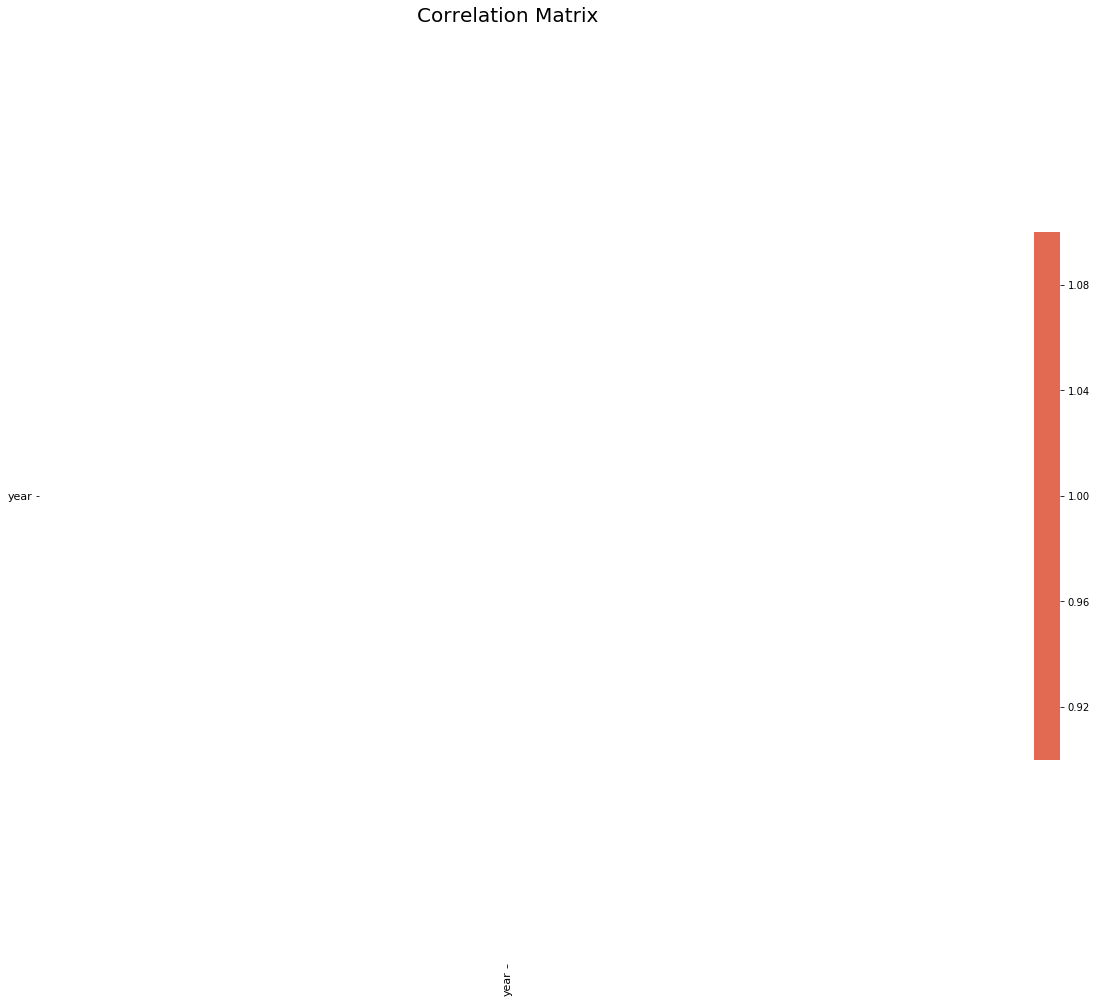

In [67]:
corr = df_test.iloc[:,2:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17,15))
cmap = sns.color_palette('coolwarm')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5,
            yticklabels=True, annot=True, fmt='.2f', cbar_kws={'shrink':.5})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()


In [39]:
df_test.head()

,State,County,Average Age,Total Actual Costs,Total Standardized Costs,year,Beneficiaries with Part A and Part B,IP Covered Stays Per 1000 Beneficiaries
0,National,NATIONAL TOTAL,72,273223420422.31,262498894390.12,2007,42506654,338
1,AK,STATE TOTAL,70,366344112.63,291376754.33,2007,53956,247
2,AK,ANCHORAGE,69,145496855.02,117498680.44,2007,21981,244
3,AK,BETHEL,71,4999320.35,2766625.52,2007,661,316
4,AK,BRISTOL BAY,68,3700870.89,2969161.96,2007,*,206


In [41]:
corr

,year
year,1.0


In [42]:
df_test.iloc[:,2:]

,Average Age,Total Actual Costs,Total Standardized Costs,year,Beneficiaries with Part A and Part B,IP Covered Stays Per 1000 Beneficiaries
0,72,273223420422.31,262498894390.12,2007,42506654,338
1,70,366344112.63,291376754.33,2007,53956,247
2,69,145496855.02,117498680.44,2007,21981,244
3,71,4999320.35,2766625.52,2007,661,316
4,68,3700870.89,2969161.96,2007,*,206
5,*,*,*,2007,*,*
6,71,3975035.53,3026175.57,2007,*,279
7,70,34326680.52,28205984.35,2007,5740,209
8,71,2271426.76,1327969.22,2007,*,220
9,*,*,*,2007,*,*


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1320272b0>]], dtype=object)

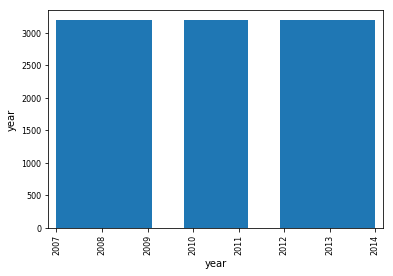

In [47]:
pd.plotting.scatter_matrix(df_test)

In [73]:
df_test.replace('*', np.nan, inplace = True)


In [75]:
df_test.dropna(inplace = True)

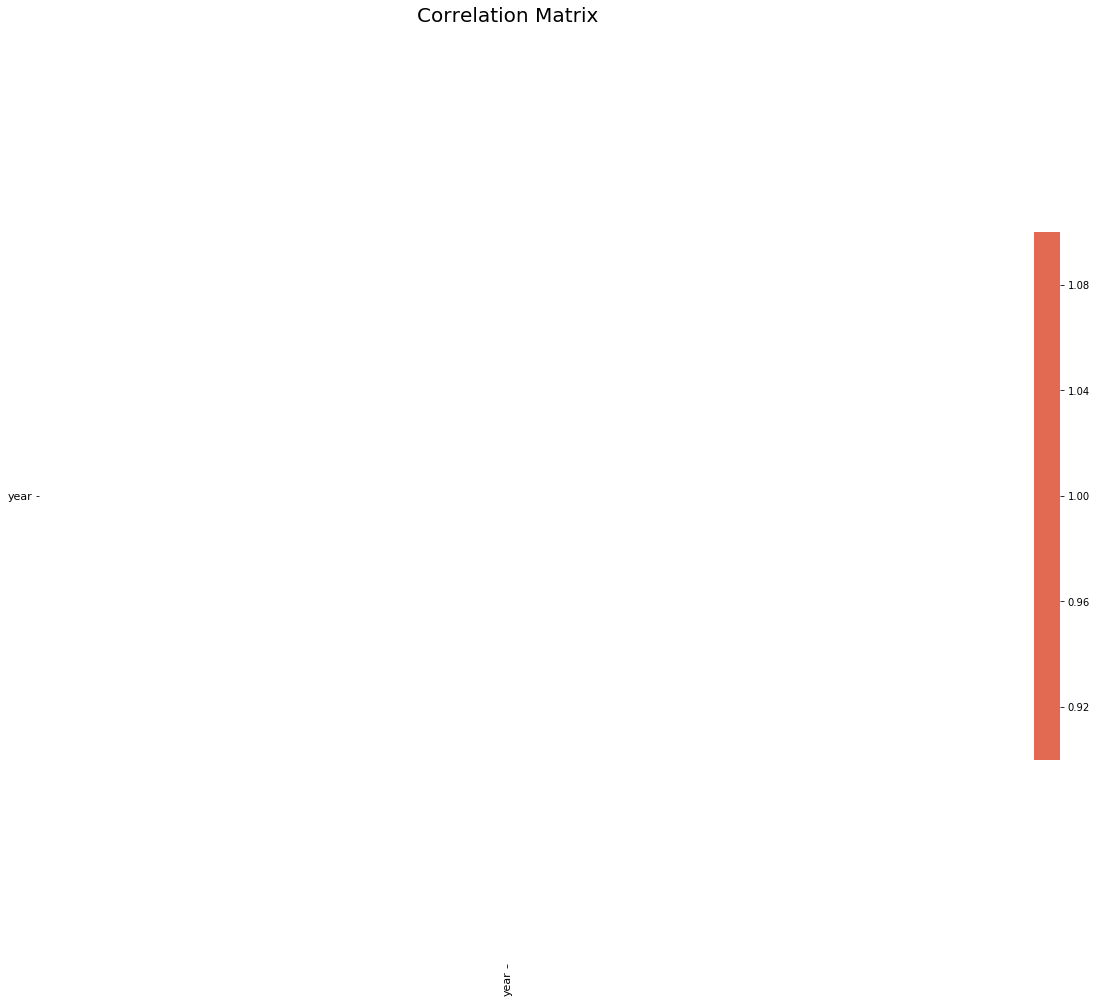

In [76]:
corr = df_test.iloc[:,2:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17,15))
cmap = sns.color_palette('coolwarm')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5,
            yticklabels=True, annot=True, fmt='.2f', cbar_kws={'shrink':.5})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()


In [77]:
corr = df_test.iloc[:,2:].corr()

In [97]:
for i in range(2, 7):
    df_test.iloc[:,i] = pd.to_numeric(df_test.iloc[:,i])

In [98]:
corr = df_test.iloc[:,2:].corr()

In [99]:
corr

,Average Age,Total Actual Costs,Total Standardized Costs,year,Beneficiaries with Part A and Part B
Average Age,1.000000,0.000044,-0.000478,-0.091342,-0.000850
Total Actual Costs,0.000044,1.000000,0.999803,0.002814,0.998958
Total Standardized Costs,-0.000478,0.999803,1.000000,0.002556,0.998781
year,-0.091342,0.002814,0.002556,1.000000,0.003265
Beneficiaries with Part A and Part B,-0.000850,0.998958,0.998781,0.003265,1.000000


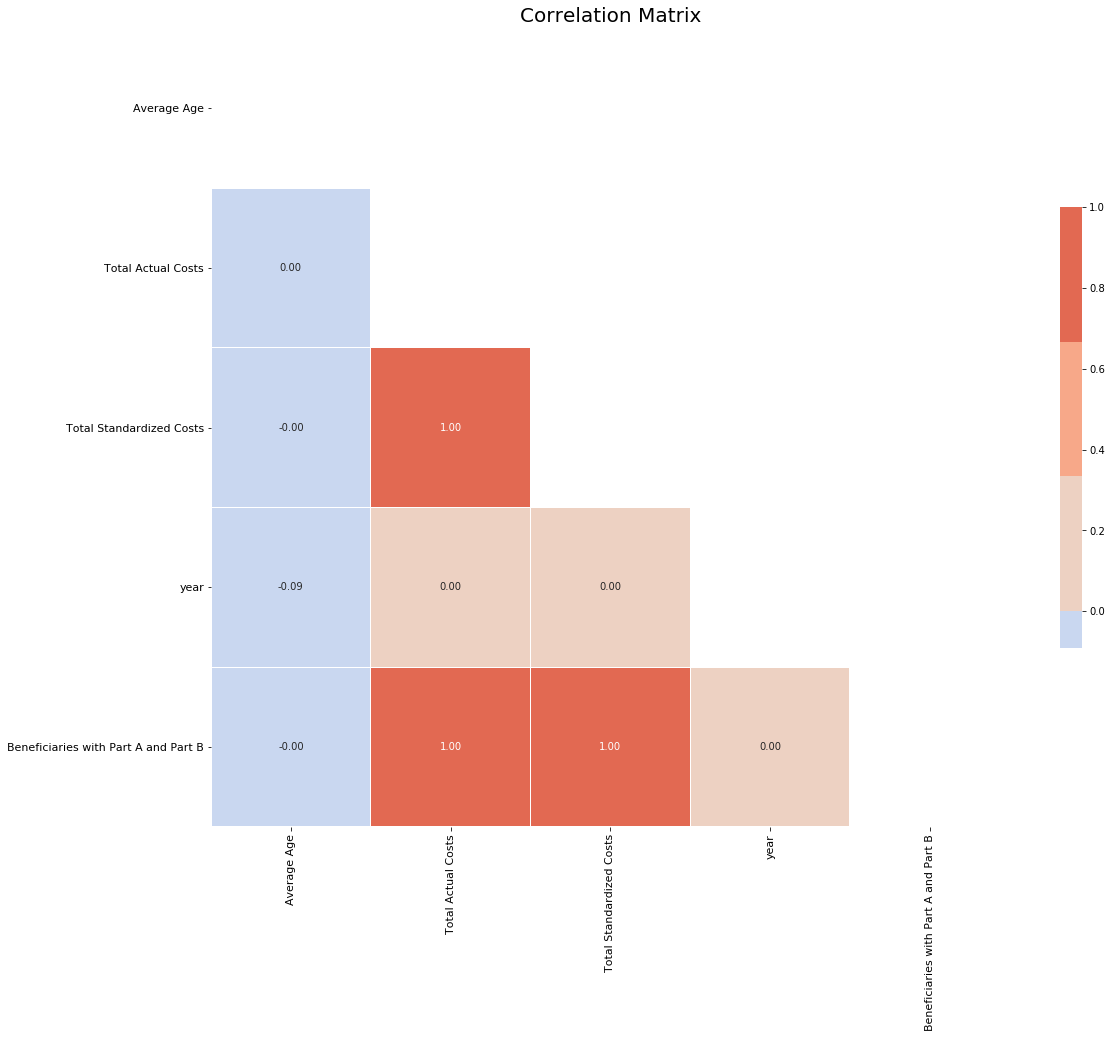

In [100]:
corr = df_test.iloc[:,2:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17,15))
cmap = sns.color_palette('coolwarm')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5,
            yticklabels=True, annot=True, fmt='.2f', cbar_kws={'shrink':.5})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()